In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

df = pd.read_csv('/kaggle/input/hse-dab-naf-23/LOCATION.csv', delimiter=';')

In [2]:
df.columns

Index(['STORE_LOCATION_RK', 'STORE_LOCATION_LVL_RK4', 'STORE_LOCATION_LVL_RK3',
       'STORE_LOCATION_LVL_RK2', 'STORE_LOCATION_LVL_RK1', 'STORE_OPEN_DTTM',
       'STORE_CLOSURE_DTTM', 'VALID_FROM_DTTM', 'VALID_TO_DTTM',
       'PROCESSED_DTTM', 'STORE_LOCATION_ADK_hashing',
       'STORE_LOCATION_ID_hashing', 'STORE_LOCATION_NM_hashing',
       'STORE_LOCATION_DESC_hashing', 'LANGUAGE_CD_hashing',
       'STORE_LOCATION_LVL_ID4_hashing', 'STORE_LOCATION_LVL_NM4_hashing',
       'STORE_LOCATION_LVL_DESC4_hashing', 'STORE_LOCATION_LVL_ID3_hashing',
       'STORE_LOCATION_LVL_NM3_hashing', 'STORE_LOCATION_LVL_DESC3_hashing',
       'STORE_LOCATION_LVL_ID2_hashing', 'STORE_LOCATION_LVL_NM2_hashing',
       'STORE_LOCATION_LVL_DESC2_hashing', 'STORE_LOCATION_LVL_ID1_hashing',
       'STORE_LOCATION_LVL_NM1_hashing', 'STORE_LOCATION_LVL_DESC1_hashing',
       'STORE_LOCATION_ATTRIB1_hashing', 'STORE_LOCATION_ATTRIB2_hashing',
       'STORE_LOCATION_ATTRIB3_hashing', 'STORE_LOCATION_ATTRIB

In [3]:
# df = df[df.PRODUCT_LVL_RK5 == 3865]

In [4]:
# chek = [column for column in df if column.endswith('hashing')]

In [5]:
# set(df['PRODUCT_LVL_RK6'].values)

In [6]:
df

,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,277,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,278,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,279,183,183,20,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
3,280,211,211,12,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
4,281,221,221,3,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1482,227,227,2,1,NaN,NaN,30Nov2019:03:40:21,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1204,1483,124,124,19,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1205,1484,24,24,11,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1206,1485,124,124,19,1,NaN,NaN,28Dec2019:10:4

In [7]:
location = pd.read_csv('/kaggle/input/hse-dab-naf-23/LOCATION.csv', delimiter=';')
product = pd.read_csv('/kaggle/input/hse-dab-naf-23/PRODUCT.csv', delimiter=';')
data = pd.read_csv('/kaggle/input/hse-dab-naf-23/train.csv')
test = pd.read_csv('/kaggle/input/hse-dab-naf-23/test.csv')

In [8]:
test

,product_id,location_id,period_dt,id
0,22939,1162,2019-12-30,16
1,23162,1162,2019-12-30,7867
2,23163,1162,2019-12-16,8667
3,23632,798,2019-12-23,14835
4,23633,1347,2019-12-30,14959
...,...,...,...,...
588,139157,1326,2019-12-16,203996
589,139157,1347,2019-12-09,203997
590,148040,425,2019-12-09,204035
591,148040,525,2019-12-09,204037


In [9]:
df = df.rename(columns = {'STORE_LOCATION_RK' : 'location_id'})
df

,location_id,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,277,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,278,124,124,19,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,279,183,183,20,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
3,280,211,211,12,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
4,281,221,221,3,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1482,227,227,2,1,NaN,NaN,30Nov2019:03:40:21,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1204,1483,124,124,19,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1205,1484,24,24,11,1,NaN,NaN,28Dec2019:10:40:25,01Jan5999:00:00:00,03Jan2020:07:00:25,...,222236EE6D50563687CE7BBC6A1D6388,E393D33ACC3FB49899A4E1F1707ACC7C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1206,1485,124,124,19,1,NaN,NaN,28Dec2019:10:40:25,0

In [10]:
test = test.merge(df, how='left')

In [11]:
# set(test['PRODUCT_LVL_RK6'].values)

In [12]:
df = pd.read_csv('/kaggle/input/hse-dab-naf-23/LOCATION.csv', delimiter=';')
df = df.rename(columns = {'STORE_LOCATION_RK' : 'location_id'})
len(set(df['location_id'].values))

1208

In [13]:
test = pd.read_csv('/kaggle/input/hse-dab-naf-23/test.csv')
test = test.merge(df, how='left')
len(set(test['location_id'].values))

35

In [14]:
data = pd.read_csv('/kaggle/input/hse-dab-naf-23/train.csv')
data = data.merge(df, how='left')
# data = data[data.PRODUCT_LVL_RK5 == 3865]
len(set(data['location_id'].fillna(0).values))

42

In [15]:
a = list(set(data['location_id'].fillna(0).astype(int).values))
a.remove(0)

In [16]:
df = df[df['location_id'].isin(a)].reset_index(drop=True)
df.head(10)

,location_id,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,309,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,317,189,189,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,355,54,54,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
3,380,189,189,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
4,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
5,453,189,189,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
6,504,25,25,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
7,517,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
8,525,54,54,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5

In [17]:
ids = dict()
for val in a:
    if len(df.index[df['location_id'] == val].tolist()) != 1:
        print(df.index[df['location_id'] == val].tolist())
#     if len(df.index[df['location_id'] == val].tolist()) != 0:
    ids[int(val)] = df.index[df['location_id'] == val].tolist()[0]

In [18]:
len(ids)

41

In [19]:
d = ids[355]
df.iloc[d]

location_id                                                      355
STORE_LOCATION_LVL_RK4                                            54
STORE_LOCATION_LVL_RK3                                            54
STORE_LOCATION_LVL_RK2                                            10
STORE_LOCATION_LVL_RK1                                             1
STORE_OPEN_DTTM                                                  NaN
STORE_CLOSURE_DTTM                                               NaN
VALID_FROM_DTTM                                   15Mar2018:14:08:08
VALID_TO_DTTM                                     01Jan5999:00:00:00
PROCESSED_DTTM                                    03Jan2020:07:00:25
STORE_LOCATION_ADK_hashing          181F921CC957DF5CEC4BF2C18E4A371F
STORE_LOCATION_ID_hashing           7DB49630E4C2E398A9B0A54FC39834FB
STORE_LOCATION_NM_hashing           8B6687082F4EB756C143F1C08E552697
STORE_LOCATION_DESC_hashing         E5E1FA47D79C1D573A65E2A4D17F6E6E
LANGUAGE_CD_hashing               

In [20]:
vec_col = ['location_id']
vec_col.extend(a)

In [21]:
len(set(vec_col))

42

In [22]:
df[df['location_id'] == 525]

,location_id,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
8,525,54,54,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91


In [23]:
mtr = pd.DataFrame(columns = vec_col)

In [24]:
mtr

,location_id,1281,644,764,517,1162,1034,525,657,1173,...,862,866,355,1380,874,1005,1143,504,380,637


In [25]:
chek = ['STORE_LOCATION_LVL_RK4', 'STORE_LOCATION_LVL_RK3', 'STORE_LOCATION_LVL_RK2', 'STORE_LOCATION_LVL_RK1'] + [column for column in df if column.endswith('hashing')]

In [26]:
df2 = df.copy()
for col in chek:
    df2[col] = df2[col].astype(str)
df2.head(10)

,location_id,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,VALID_FROM_DTTM,VALID_TO_DTTM,PROCESSED_DTTM,...,STORE_LOCATION_ATTRIB12_hashing,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing
0,309,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,6BA1D912365C006B003750C17E810A8C,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
1,317,189,189,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
2,355,54,54,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
3,380,189,189,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
4,425,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
5,453,189,189,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
6,504,25,25,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
7,517,203,203,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91
8,525,54,54,10,1,NaN,NaN,15Mar2018:14:08:08,01Jan5999:00:00:00,03Jan2020:07:00:25,...,67B1193B31375E3C959BB5246989D0CA,17AC9AE74D16FBC665FFB4CFC2DF24F5

In [27]:
# result.iloc[2140]
df2.shape

(41, 48)

In [28]:
result = pd.DataFrame(columns=chek, index=pd.MultiIndex.from_product([df2.index, df2.index]))
result

STORE_LOCATION_LVL_RK4 STORE_LOCATION_LVL_RK3 STORE_LOCATION_LVL_RK2  \
0  0                     NaN                    NaN                    NaN   
   1                     NaN                    NaN                    NaN   
   2                     NaN                    NaN                    NaN   
   3                     NaN                    NaN                    NaN   
   4                     NaN                    NaN                    NaN   
...                      ...                    ...                    ...   
40 36                    NaN                    NaN                    NaN   
   37                    NaN                    NaN                    NaN   
   38                    NaN                    NaN                    NaN   
   39                    NaN                    NaN                    NaN   
   40                    NaN                    NaN                    NaN   

      STORE_LOCATION_LVL_RK1 STORE_LOCATION_ADK_hashing  \
0  0                     NaN                        NaN   
   1                     NaN                        NaN   
   2                     NaN                        NaN   
   3                     NaN                        NaN   
   4                     NaN                        NaN   
...                      ...                        ...   
40 36                    NaN                        NaN   
   37                    NaN                        NaN   
   38                    NaN                        NaN   
   39                    NaN                        NaN   
   40                    NaN                        NaN   

      STORE_LOCATION_ID_hashing STORE_LOCATION_NM_hashing  \
0  0                        NaN                       NaN   
   1                        NaN                       NaN   
   2                        NaN                       NaN   
   3                        NaN                       NaN   
   4                        NaN                       NaN   
...                         ...                       ...   
40 36                       NaN                       NaN   
   37                       NaN                       NaN   
   38                       NaN                       NaN   
   39                       NaN                       NaN   
   40                       NaN                       NaN   

      STORE_LOCATION_DESC_hashing LANGUAGE_CD_hashing  \
0  0                          NaN                 NaN   
   1                          NaN                 NaN   
   2                          NaN                 NaN   
   3                          NaN                 NaN   
   4                          NaN                 NaN   
...                           ...                 ...   
40 36                         NaN                 NaN   
   37                         NaN                 NaN   
   38                         NaN                 NaN   
   39                         NaN                 NaN   
   40                         NaN                 NaN   

      STORE_LOCATION_LVL_ID4_hashing  ... STORE_LOCATION_ATTRIB12_hashing  \
0  0                             NaN  ...                             NaN   
   1                             NaN  ...                             NaN   
   2                             NaN  ...                             NaN   
   3                             NaN  ...                             NaN   
   4                             NaN  ...                             NaN   
...                              ...  ...                             ...   
40 36                            NaN  ...                             NaN   
   37                            NaN  ...                             NaN   
   38                            NaN  ...                             NaN   
   39                            NaN  ...                             NaN   
   40                            NaN  ...                             NaN   

      STORE_LOCAT

In [29]:
from tqdm import tqdm

for col in tqdm(chek):
    result[col] = np.equal.outer(df2[col].to_numpy(), df2[col].to_numpy()).ravel()
result

100%|██████████| 42/42 [00:00<00:00, 1586.88it/s]


STORE_LOCATION_LVL_RK4  STORE_LOCATION_LVL_RK3  STORE_LOCATION_LVL_RK2  \
0  0                     True                    True                    True   
   1                    False                   False                    True   
   2                    False                   False                    True   
   3                    False                   False                    True   
   4                     True                    True                    True   
...                       ...                     ...                     ...   
40 36                   False                   False                    True   
   37                   False                   False                    True   
   38                   False                   False                    True   
   39                   False                   False                    True   
   40                    True                    True                    True   

       STORE_LOCATION_LVL_RK1  STORE_LOCATION_ADK_hashing  \
0  0                     True                        True   
   1                     True                        True   
   2                     True                        True   
   3                     True                        True   
   4                     True                        True   
...                       ...                         ...   
40 36                    True                        True   
   37                    True                        True   
   38                    True                        True   
   39                    True                        True   
   40                    True                        True   

       STORE_LOCATION_ID_hashing  STORE_LOCATION_NM_hashing  \
0  0                        True                       True   
   1                       False                      False   
   2                       False                      False   
   3                       False                      False   
   4                       False                      False   
...                          ...                        ...   
40 36                      False                      False   
   37                      False                      False   
   38                      False                      False   
   39                      False                      False   
   40                       True                       True   

       STORE_LOCATION_DESC_hashing  LANGUAGE_CD_hashing  \
0  0                          True                 True   
   1                          True                 True   
   2                          True                 True   
   3                          True                 True   
   4                          True                 True   
...                            ...                  ...   
40 36                         True                 True   
   37                         True                 True   
   38                         True                 True   
   39                         True                 True   
   40                         True                 True   

       STORE_LOCATION_LVL_ID4_hashing  ...  STORE_LOCATION_ATTRIB12_hashing  \
0  0                             True  ...                             True   
   1                            False  ...                            False   
   2                            False  ...                            False   
   3                            False  ...                            False   
   4                             True  ...                            False   
...                               ...  ...                              ...   
40 36                           False  ...                             True   
   37                           False  ...                             True   
   38                           False  ...                             True   
   39                           False  ...   

In [30]:
for col in tqdm(chek):
    result[col] = result[col].astype(float)
result

100%|██████████| 42/42 [00:00<00:00, 3113.43it/s]


STORE_LOCATION_LVL_RK4  STORE_LOCATION_LVL_RK3  STORE_LOCATION_LVL_RK2  \
0  0                      1.0                     1.0                     1.0   
   1                      0.0                     0.0                     1.0   
   2                      0.0                     0.0                     1.0   
   3                      0.0                     0.0                     1.0   
   4                      1.0                     1.0                     1.0   
...                       ...                     ...                     ...   
40 36                     0.0                     0.0                     1.0   
   37                     0.0                     0.0                     1.0   
   38                     0.0                     0.0                     1.0   
   39                     0.0                     0.0                     1.0   
   40                     1.0                     1.0                     1.0   

       STORE_LOCATION_LVL_RK1  STORE_LOCATION_ADK_hashing  \
0  0                      1.0                         1.0   
   1                      1.0                         1.0   
   2                      1.0                         1.0   
   3                      1.0                         1.0   
   4                      1.0                         1.0   
...                       ...                         ...   
40 36                     1.0                         1.0   
   37                     1.0                         1.0   
   38                     1.0                         1.0   
   39                     1.0                         1.0   
   40                     1.0                         1.0   

       STORE_LOCATION_ID_hashing  STORE_LOCATION_NM_hashing  \
0  0                         1.0                        1.0   
   1                         0.0                        0.0   
   2                         0.0                        0.0   
   3                         0.0                        0.0   
   4                         0.0                        0.0   
...                          ...                        ...   
40 36                        0.0                        0.0   
   37                        0.0                        0.0   
   38                        0.0                        0.0   
   39                        0.0                        0.0   
   40                        1.0                        1.0   

       STORE_LOCATION_DESC_hashing  LANGUAGE_CD_hashing  \
0  0                           1.0                  1.0   
   1                           1.0                  1.0   
   2                           1.0                  1.0   
   3                           1.0                  1.0   
   4                           1.0                  1.0   
...                            ...                  ...   
40 36                          1.0                  1.0   
   37                          1.0                  1.0   
   38                          1.0                  1.0   
   39                          1.0                  1.0   
   40                          1.0                  1.0   

       STORE_LOCATION_LVL_ID4_hashing  ...  STORE_LOCATION_ATTRIB12_hashing  \
0  0                              1.0  ...                              1.0   
   1                              0.0  ...                              0.0   
   2                              0.0  ...                              0.0   
   3                              0.0  ...                              0.0   
   4                              1.0  ...                              0.0   
...                               ...  ...                              ...   
40 36                             0.0  ...                              1.0   
   37                             0.0  ...                              1.0   
   38                             0.0  ...                              1.0   
   39                             0.0  ...   

In [31]:
result['sum_'] = 0
for col in tqdm(chek):
    result['sum_'] +=result[col].astype(float)
result['sum_'] /= len(chek)
result

100%|██████████| 42/42 [00:00<00:00, 2139.28it/s]


STORE_LOCATION_LVL_RK4  STORE_LOCATION_LVL_RK3  STORE_LOCATION_LVL_RK2  \
0  0                      1.0                     1.0                     1.0   
   1                      0.0                     0.0                     1.0   
   2                      0.0                     0.0                     1.0   
   3                      0.0                     0.0                     1.0   
   4                      1.0                     1.0                     1.0   
...                       ...                     ...                     ...   
40 36                     0.0                     0.0                     1.0   
   37                     0.0                     0.0                     1.0   
   38                     0.0                     0.0                     1.0   
   39                     0.0                     0.0                     1.0   
   40                     1.0                     1.0                     1.0   

       STORE_LOCATION_LVL_RK1  STORE_LOCATION_ADK_hashing  \
0  0                      1.0                         1.0   
   1                      1.0                         1.0   
   2                      1.0                         1.0   
   3                      1.0                         1.0   
   4                      1.0                         1.0   
...                       ...                         ...   
40 36                     1.0                         1.0   
   37                     1.0                         1.0   
   38                     1.0                         1.0   
   39                     1.0                         1.0   
   40                     1.0                         1.0   

       STORE_LOCATION_ID_hashing  STORE_LOCATION_NM_hashing  \
0  0                         1.0                        1.0   
   1                         0.0                        0.0   
   2                         0.0                        0.0   
   3                         0.0                        0.0   
   4                         0.0                        0.0   
...                          ...                        ...   
40 36                        0.0                        0.0   
   37                        0.0                        0.0   
   38                        0.0                        0.0   
   39                        0.0                        0.0   
   40                        1.0                        1.0   

       STORE_LOCATION_DESC_hashing  LANGUAGE_CD_hashing  \
0  0                           1.0                  1.0   
   1                           1.0                  1.0   
   2                           1.0                  1.0   
   3                           1.0                  1.0   
   4                           1.0                  1.0   
...                            ...                  ...   
40 36                          1.0                  1.0   
   37                          1.0                  1.0   
   38                          1.0                  1.0   
   39                          1.0                  1.0   
   40                          1.0                  1.0   

       STORE_LOCATION_LVL_ID4_hashing  ...  STORE_LOCATION_ATTRIB13_hashing  \
0  0                              1.0  ...                              1.0   
   1                              0.0  ...                              0.0   
   2                              0.0  ...                              0.0   
   3                              0.0  ...                              0.0   
   4                              1.0  ...                              0.0   
...                               ...  ...                              ...   
40 36                             0.0  ...                              1.0   
   37                             0.0  ...                              1.0   
   38                             0.0  ...                              1.0   
   39                             0.0  ...   

In [32]:
result.iloc[1, 42]

0.6190476190476191

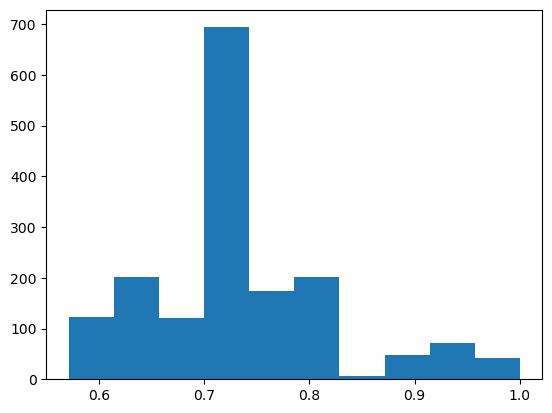

In [33]:
plt.hist(result['sum_'])
plt.show()

In [34]:
df1 = df.copy()
df1 = df1[chek]

In [35]:
from tqdm import tqdm

def len_(p1, p2):
    
    return (p1 == p2).mean()

i = 0
for prod1 in tqdm(a):
    vec = []
    vec.append(prod1)
#     flag = False
    for j, prod2 in enumerate(a):
        vec.append(result.iloc[ids[prod1]*41 + ids[prod2], 42])
#     print(vec)
    mtr.loc[i] = vec
    i += 1
            

100%|██████████| 41/41 [00:00<00:00, 352.21it/s]


In [36]:
mtr

,location_id,1281,644,764,517,1162,1034,525,657,1173,...,862,866,355,1380,874,1005,1143,504,380,637
0,1281.0,1.000000,0.714286,0.666667,0.928571,0.714286,0.928571,0.738095,0.738095,0.785714,...,0.738095,0.738095,0.738095,0.714286,0.738095,0.619048,0.785714,0.738095,0.714286,0.738095
1,644.0,0.714286,1.000000,0.690476,0.738095,0.928571,0.714286,0.761905,0.714286,0.738095,...,0.738095,0.714286,0.738095,0.690476,0.714286,0.595238,0.738095,0.785714,0.880952,0.738095
2,764.0,0.666667,0.690476,1.000000,0.666667,0.690476,0.666667,0.714286,0.880952,0.666667,...,0.690476,0.857143,0.690476,0.857143,0.714286,0.785714,0.666667,0.666667,0.690476,0.690476
3,517.0,0.928571,0.738095,0.666667,1.000000,0.714286,0.928571,0.714286,0.738095,0.809524,...,0.738095,0.738095,0.738095,0.714286,0.738095,0.619048,0.809524,0.761905,0.714286,0.738095
4,1162.0,0.714286,0.928571,0.690476,0.714286,1.000000,0.714286,0.761905,0.714286,0.714286,...,0.738095,0.714286,0.738095,0.690476,0.714286,0.595238,0.714286,0.761905,0.880952,0.738095
5,1034.0,0.928571,0.714286,0.666667,0.928571,0.714286,1.000000,0.714286,0.738095,0.785714,...,0.738095,0.738095,0.738095,0.714286,0.738095,0.619048,0.785714,0.738095,0.714286,0.738095
6,525.0,0.738095,0.761905,0.714286,0.714286,0.761905,0.714286,1.000000,0.738095,0.714286,...,0.904762,0.738095,0.904762,0.714286,0.738095,0.619048,0.714286,0.738095,0.714286,0.904762
7,657.0,0.738095,0.714286,0.880952,0.738095,0.714286,0.738095,0.738095,1.000000,0.738095,...,0.761905,0.928571,0.761905,0.904762,0.785714,0.833333,0.738095,0.738095,0.714286,0.761905
8,1173.0,0.785714,0.738095,0.666667,0.809524,0.714286,0.785714,0.714286,0.738095,1.000000,...,0.738095,0.738095,0.738095,0.714286,0.738095,0.619048,0.809524,0.761905,0.714286,0.738095
9,533.0,0.666667,0.619048,0.571429,0.690476,0.595238,0.666667,0.595238,0.619048,0.690476,...,0.619048,0.619048,0.619048,0.619048,0.619048,0.738095,0.690476,0.642857,0.595238,0.619048


In [37]:
mtr.to_csv('location_sim.csv', index=False)

In [38]:
from scipy.stats.stats import pearsonr

kl = mtr.iloc[0].copy().drop('location_id')
t = kl.iloc[np.argsort(kl)][20:]
len(t.index)

/tmp/ipykernel_32/780660081.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


21

In [39]:
def get_reco_dict(mtr, k):
    ans = dict()
    for i in tqdm(range(mtr.shape[0])):
        kl = mtr.iloc[i].copy()
        prod = kl['location_id']
        kl = kl.drop('location_id')
        ans[prod] = list(kl.iloc[np.argsort(kl)][41-k:].index)
    return ans

In [40]:
rec = get_reco_dict(mtr, 20)

100%|██████████| 41/41 [00:00<00:00, 1101.61it/s]


In [41]:
str_vec = []
for i in range(20):
    str_vec.append('rec_loc' + str(i))

In [42]:
mtr_rec = pd.DataFrame(columns=['product_id'] + str_vec)
mtr_rec

,product_id,rec_loc0,rec_loc1,rec_loc2,rec_loc3,rec_loc4,rec_loc5,rec_loc6,rec_loc7,rec_loc8,...,rec_loc10,rec_loc11,rec_loc12,rec_loc13,rec_loc14,rec_loc15,rec_loc16,rec_loc17,rec_loc18,rec_loc19


In [43]:
i=0
for p in rec:
    vec = []
    vec.append(p)
    vec.extend(reversed(rec[p]))
    mtr_rec.loc[i] = vec
    i+=1
mtr_rec

,product_id,rec_loc0,rec_loc1,rec_loc2,rec_loc3,rec_loc4,rec_loc5,rec_loc6,rec_loc7,rec_loc8,...,rec_loc10,rec_loc11,rec_loc12,rec_loc13,rec_loc14,rec_loc15,rec_loc16,rec_loc17,rec_loc18,rec_loc19
0,1281.0,1281.0,1326.0,798.0,517.0,425.0,1034.0,1316.0,1363.0,535.0,...,1191.0,1143.0,1079.0,309.0,1202.0,1203.0,657.0,1185.0,525.0,555.0
1,644.0,644.0,1162.0,317.0,453.0,1347.0,380.0,1080.0,504.0,557.0,...,1185.0,555.0,637.0,562.0,1173.0,517.0,535.0,1328.0,1143.0,1079.0
2,764.0,764.0,657.0,1380.0,866.0,1005.0,557.0,874.0,525.0,637.0,...,644.0,1162.0,380.0,562.0,1328.0,355.0,453.0,862.0,1079.0,1185.0
3,517.0,517.0,1281.0,425.0,1316.0,1034.0,798.0,1326.0,1173.0,535.0,...,1079.0,1202.0,1363.0,309.0,1191.0,317.0,1203.0,504.0,644.0,657.0
4,1162.0,1162.0,453.0,644.0,1347.0,317.0,380.0,1080.0,504.0,525.0,...,555.0,557.0,637.0,562.0,1328.0,862.0,355.0,1079.0,1316.0,1143.0
5,1034.0,1034.0,1281.0,517.0,798.0,1326.0,1316.0,425.0,1079.0,1143.0,...,1173.0,535.0,1363.0,1191.0,309.0,1203.0,555.0,657.0,1185.0,637.0
6,525.0,525.0,557.0,637.0,355.0,862.0,1328.0,644.0,1162.0,453.0,...,1326.0,504.0,657.0,1185.0,874.0,1281.0,317.0,866.0,1363.0,1347.0
7,657.0,657.0,866.0,1380.0,764.0,1005.0,874.0,637.0,862.0,557.0,...,355.0,1363.0,425.0,504.0,517.0,1034.0,525.0,1143.0,1173.0,535.0
8,1173.0,1173.0,1143.0,517.0,1079.0,535.0,1281.0,798.0,425.0,1191.0,...,1363.0,1326.0,1034.0,317.0,504.0,1203.0,1185.0,657.0,644.0,555.0
9,533.0,533.0,540.0,1363.0,1203.0,1202.0,309.0,1005.0,1080.0,535.0,...,517.0,1173.0,1079.0,1316.0,1326.0,798.0,1281.0,1191.0,1034.0,425.0


In [44]:
mtr_rec.to_csv('location_rec.csv', index=False)

In [45]:
data = pd.read_csv('/kaggle/input/hse-dab-naf-23/train.csv')
data = data.merge(df, how='left')
# data = data[data.PRODUCT_LVL_RK5 == 3865]
len(set(data['location_id'].fillna(0).values))

42

In [46]:
data = pd.read_csv('/kaggle/input/hse-dab-naf-23/train.csv')
data = data.merge(df, how='left')
# data = data[data.PRODUCT_LVL_RK5 == 3865]
len(set(data['location_id'].fillna(0).values))

42

In [47]:
data_grop = data.groupby(by='location_id', as_index=False).mean()

/tmp/ipykernel_32/2738224065.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grop = data.groupby(by='location_id', as_index=False).mean()


In [48]:
k = data['demand'].mean()
k

0.4186609237332906

In [49]:
data_grop['calk'] = abs(data_grop['demand'] - k)

In [50]:
data_grop['calk'].mean()

0.15157768971922408

In [51]:
data_grop

,location_id,product_id,demand,PROMO1_FLAG,PROMO2_FLAG,PRICE_REGULAR,PRICE_AFTER_DISC,NUM_CONSULTANT,AUTORIZATION_FLAG,id,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,calk
0,309.0,54351.302419,1.063167,NaN,NaN,NaN,NaN,NaN,NaN,133093.463710,203.0,203.0,10.0,1.0,NaN,NaN,0.644506
1,317.0,51550.031621,0.241043,0.321116,0.000000,3300.964825,2217.745321,0.000000,0.841833,132220.362055,189.0,189.0,10.0,1.0,NaN,NaN,0.177618
2,355.0,58962.451364,0.329440,0.388294,0.003603,3384.178473,2294.375273,0.000000,0.946713,137868.494946,54.0,54.0,10.0,1.0,NaN,NaN,0.089221
3,380.0,52363.996856,0.301681,0.437157,0.005272,3303.357236,2184.313995,0.000000,0.713834,137835.895410,189.0,189.0,10.0,1.0,NaN,NaN,0.116980
4,425.0,54636.885014,0.311807,0.403410,0.001955,3193.067675,2091.172647,0.063272,0.848741,144977.785130,203.0,203.0,10.0,1.0,NaN,NaN,0.106854
5,453.0,55001.495474,0.307389,0.391496,0.000802,3393.352347,2190.159044,0.000000,0.868732,152269.030041,189.0,189.0,10.0,1.0,NaN,NaN,0.111272
6,504.0,55165.023855,0.223932,0.298359,0.000000,3267.816051,2336.617442,0.000000,0.537200,156219.604317,25.0,25.0,10.0,1.0,NaN,NaN,0.194729
7,517.0,60387.724063,0.358064,0.549643,0.000000,2923.025092,1886.817103,0.000000,0.861766,151794.661597,203.0,203.0,10.0,1.0,NaN,NaN,0.060597
8,525.0,62536.465565,0.326012,0.380499,0.002615,3372.446838,2259.131416,0.000000,0.961239,136143.376449,54.0,54.0,10.0,1.0,NaN,NaN,0.092649
9,533.0,54429.578354,0.218085,0.400455,0.000000,3116.662871,2282.517791,0.000000,0.340159,160860.777903,26.0,26.0,10.0,1.0,NaN,NaN,0.200576


In [52]:
dem = dict()
for i in range(data_grop.shape[0]):
    dem[data_grop.iloc[i, 0]] = data_grop.iloc[i, 2]

In [61]:
data_grop['calk1'] = 0
for i in range(data_grop.shape[0]):
    lo = data_grop.iloc[i, 0]
    data_grop.iloc[i, 17] = abs(dem[lo] - dem[rec[lo][18]])

In [62]:
len(data_grop.columns)

18

(array([23.,  5.,  3.,  3.,  2.,  2.,  0.,  0.,  1.,  2.]),
 array([0.00636258, 0.08404208, 0.16172158, 0.23940108, 0.31708058,
        0.39476008, 0.47243959, 0.55011909, 0.62779859, 0.70547809,
        0.78315759]),
 <BarContainer object of 10 artists>)

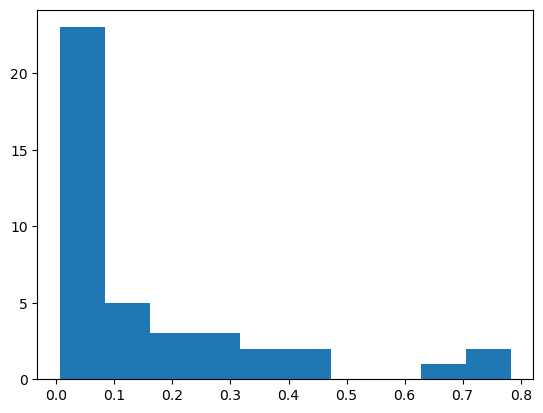

In [63]:
plt.hist(data_grop['calk1'])

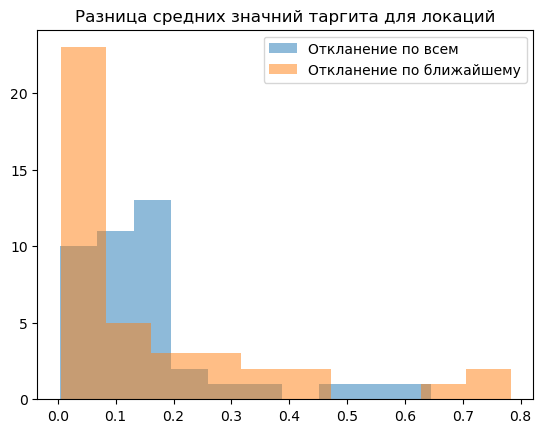

In [64]:
plt.hist(data_grop['calk'], alpha = 0.5, label='Откланение по всем')
plt.hist(data_grop['calk1'], alpha = 0.5, label='Откланение по ближайшему')
plt.title('Разница средних значний таргита для локаций')
plt.legend()